In [51]:
import pandas as pd
import numpy as np
import sys, re, requests, collections, glob, time 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
import os
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
import json
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None
%matplotlib inline

In [55]:
regSeason = pd.read_csv("RegularSeasonResults.csv", header = 0,index_col = 0)
print(regSeason.head())
X = regSeason.drop(["target"], axis = 1)
y = regSeason[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 50)

                target  deltaOR  deltaStl  deltaFTP  deltaAst  deltaNeutWin  \
2003_1102_1117       1    -6.78     -1.19     -8.65      1.08          -1.0   
2003_1102_1125       1    -6.36     -3.11     -5.05     -3.89          -2.0   
2003_1102_1140       0    -6.69     -0.98    -10.16     -0.42          -4.0   
2003_1102_1161       1    -6.62      0.63     -4.91     -2.50          -2.0   
2003_1102_1204       1    -9.32     -1.42      0.99     -0.62          -1.0   

                deltaPF  deltaAwayWin  deltaFGP  deltaWinRank  deltaBlk  \
2003_1102_1117    -2.67           0.0      4.79         -4.70      0.14   
2003_1102_1125     0.39          -4.0      1.53        -11.88      0.08   
2003_1102_1140    -2.67          -3.0      1.23         95.75     -0.73   
2003_1102_1161    -1.82           0.0     -2.56         62.10     -2.44   
2003_1102_1204    -0.67          -3.0      2.22        -21.94     -1.90   

                deltaFG3  deltaWins  deltaLossRank  deltaDR  deltaGames  \

[20:50:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:50:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:50:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:50:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[20:50:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[20:50:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[20:50:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[20:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[20:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned no

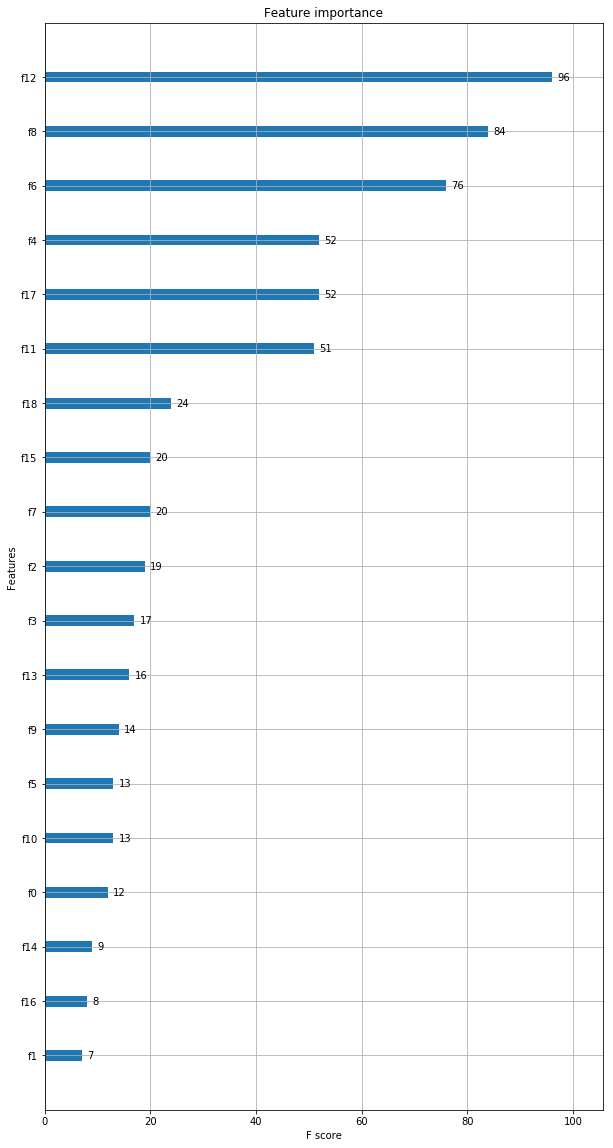

0 target
1 deltaOR
2 deltaStl
3 deltaFTP
4 deltaAst
5 deltaNeutWin
6 deltaPF
7 deltaAwayWin
8 deltaFGP
9 deltaWinRank
10 deltaBlk
11 deltaFG3
12 deltaWins
13 deltaLossRank
14 deltaDR
15 deltaGames
16 deltaAvgScore
17 deltaUpsets
18 deltaHomeWins
19 deltaTo


In [56]:
#XGBoost
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values)

params  = {'objective': 'binary:logistic'
          } 

model = xgb.train(params=params, dtrain=xgtrain)
preds = model.predict(xgtest)

predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Log Loss: {}".format(log_loss(y_test, preds)))

def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

my_plot_importance(model, (10,20))
plt.show()

for idx, i in (enumerate(regSeason)):
    print(idx, i)
